# **Step 1: Reading, Understaning and Cleaning the data**

In [2]:
# 1.1 Importing all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Hopkins-Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1.2 Reading the data
Countries = pd.read_csv("F:\\Users\\R R\\Country-data.csv")
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
Countries.shape

(167, 10)

In [5]:
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [ ]:
# There are no null values

In [7]:
Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
# 1.3 Cleaning the data

Countries["exports"] = (Countries["exports"] * Countries["gdpp"]) / 100
Countries["health"] = (Countries["health"] * Countries["gdpp"]) / 100
Countries["imports"] = (Countries["imports"] * Countries["gdpp"]) / 100

Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


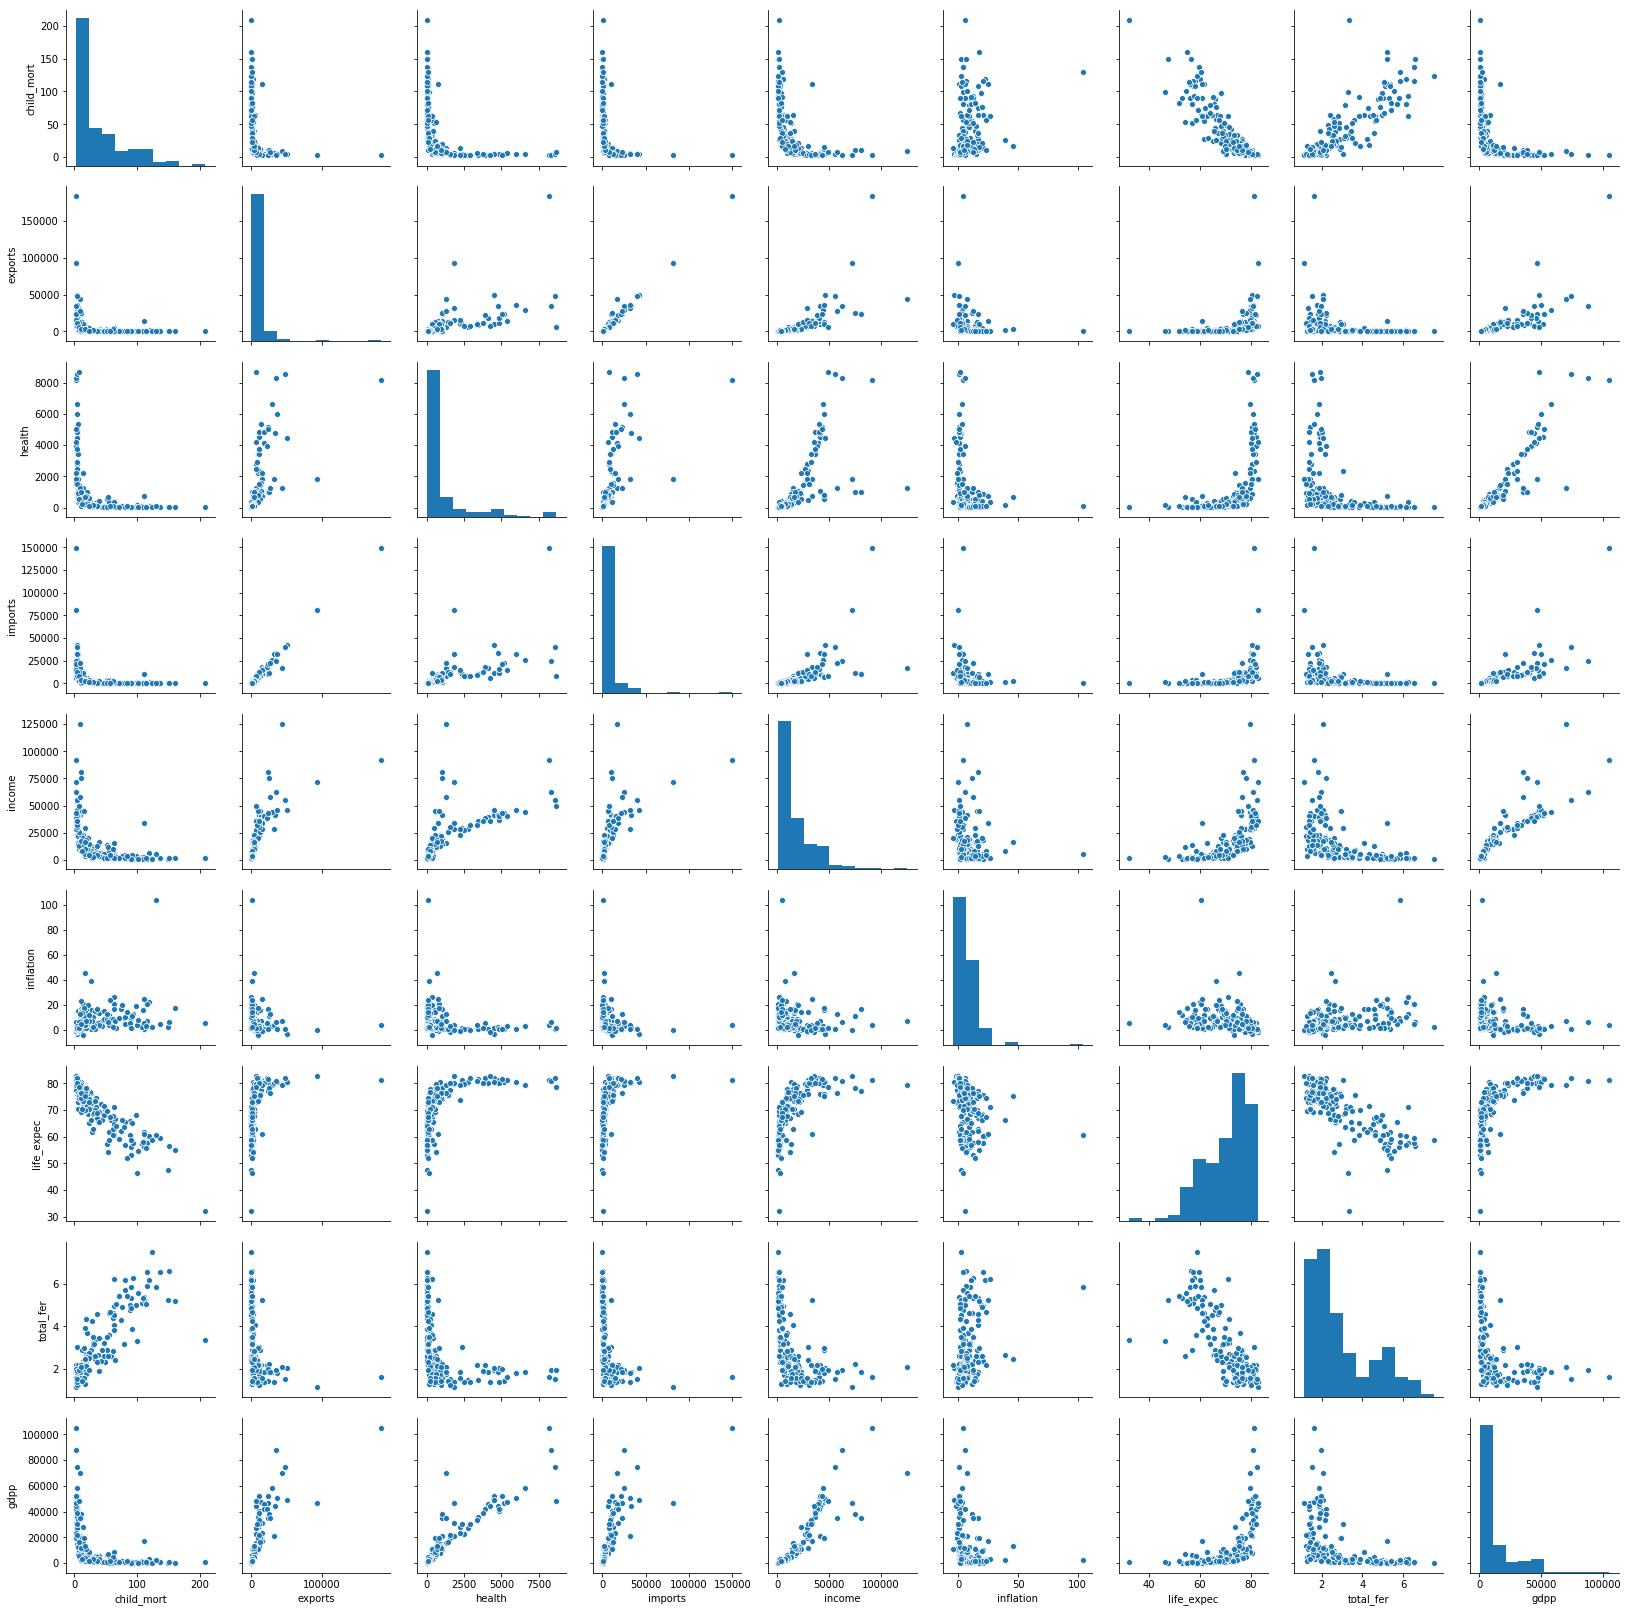

In [9]:
# 1.4 Visualizing the data

sns.pairplot(Countries)
plt.show()

In [10]:
# **Step 2 : Scaling the Data**
Countries_scaled = Countries.drop('country', axis =1)
Countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
scaler = StandardScaler()
Countries_scaled = scaler.fit_transform(Countries_scaled)
Countries_scaled.shape

(167, 9)

In [12]:
Countries_scaled = pd.DataFrame(Countries_scaled)
Countries_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
Countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [13]:
# **Step 3 : Applying PCA**

pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(Countries_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [15]:
# 3.1 Ploting the scree plot to assess the number of Principal Components needed

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

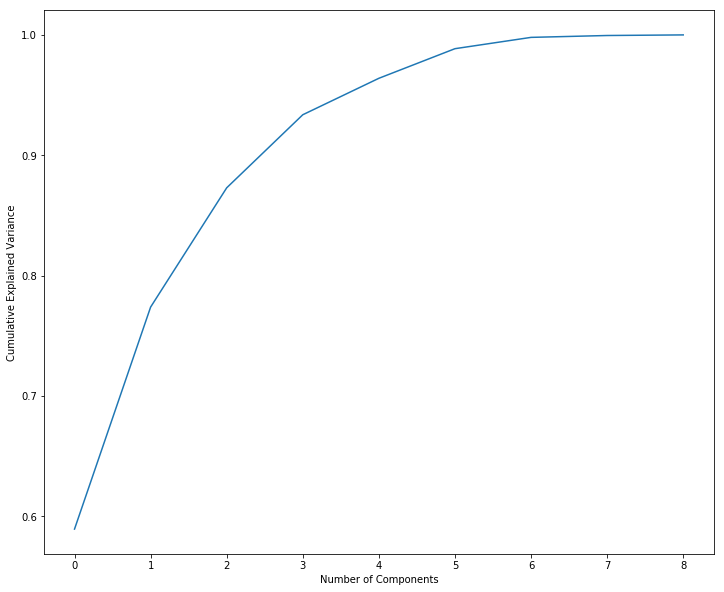

In [16]:
# 3.1.1 Plotting cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [17]:
# We can see 5 components are describing more than 95% of the Variance

In [18]:
colnames = list(Countries_scaled.columns)
pca_df = pd.DataFrame({'Feature' : colnames, 'PC1' : pca.components_[0], 'PC2' : pca.components_[1], 'PC3' : pca.components_[2], 'PC4' : pca.components_[3], 'PC5': pca.components_[4]})
pca_df.head()

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075


In [19]:
#3.3 Reducing the dimentionality using 5 components
pca_final = IncrementalPCA(n_components = 5)

In [20]:
pca1 = pca_final.fit_transform(Countries_scaled)
pca1.shape

(167, 5)

In [21]:
pca1

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

In [22]:
# 3.4 Transposing so that the columns are properly arranged

pc = np.transpose(pca1)
pc_df = pd.DataFrame({'PC1' : pc[0], 'PC2' : pc[1], 'PC3' : pc[2], 'PC4' : pc[3], 'PC5' : pc[4]})
pc_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


{'whiskers': [<matplotlib.lines.Line2D at 0x129e5ecc88>,
 'caps': [<matplotlib.lines.Line2D at 0x129e606358>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e5ec860>],
 'medians': [<matplotlib.lines.Line2D at 0x129e6069e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e606d30>],
 'means': []}

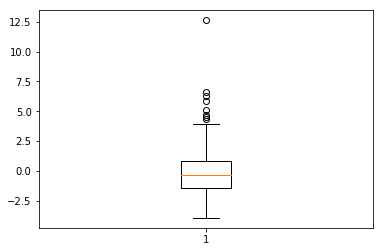

In [23]:
# ** Step 4 : Outlier Analysis **

# 4.1 PC1
plt.boxplot(pc_df.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x129e6704a8>,
 'caps': [<matplotlib.lines.Line2D at 0x129e670b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e6700b8>],
 'medians': [<matplotlib.lines.Line2D at 0x129e670f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e67a550>],
 'means': []}

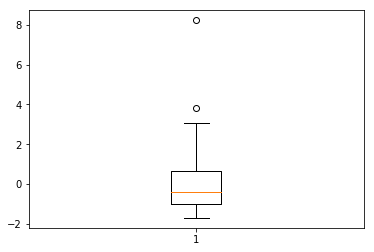

In [24]:
# 4.2 PC2

plt.boxplot(pc_df.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0x129e6c2780>,
 'caps': [<matplotlib.lines.Line2D at 0x129e6c2e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e6c2390>],
 'medians': [<matplotlib.lines.Line2D at 0x129e6cb4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e6cb828>],
 'means': []}

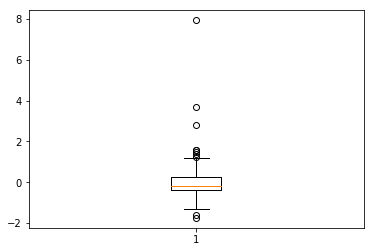

In [25]:
# 4.3 PC3

plt.boxplot(pc_df.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x129e716e80>,
 'caps': [<matplotlib.lines.Line2D at 0x129e723550>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e716a90>],
 'medians': [<matplotlib.lines.Line2D at 0x129e723be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e723f28>],
 'means': []}

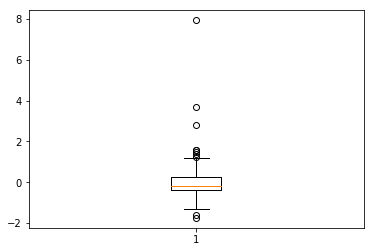

In [26]:
# 4.4 PC3

plt.boxplot(pc_df.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x129e7757b8>,
 'caps': [<matplotlib.lines.Line2D at 0x129e775e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e7753c8>],
 'medians': [<matplotlib.lines.Line2D at 0x129e781518>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e781860>],
 'means': []}

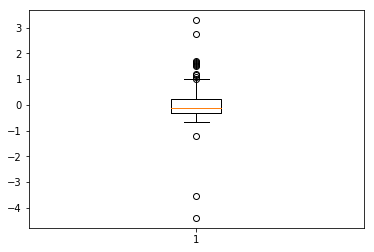

In [27]:
# 4.5 PC4

plt.boxplot(pc_df.PC4)

{'whiskers': [<matplotlib.lines.Line2D at 0x129e7d19e8>,
 'caps': [<matplotlib.lines.Line2D at 0x129e7d1e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x129e7d15f8>],
 'medians': [<matplotlib.lines.Line2D at 0x129e7df748>],
 'fliers': [<matplotlib.lines.Line2D at 0x129e7dfa90>],
 'means': []}

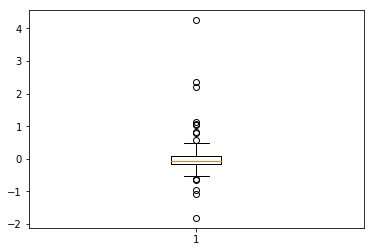

In [28]:
# 4.6 PC5

plt.boxplot(pc_df.PC5)

In [29]:
# I am not removing any outliers

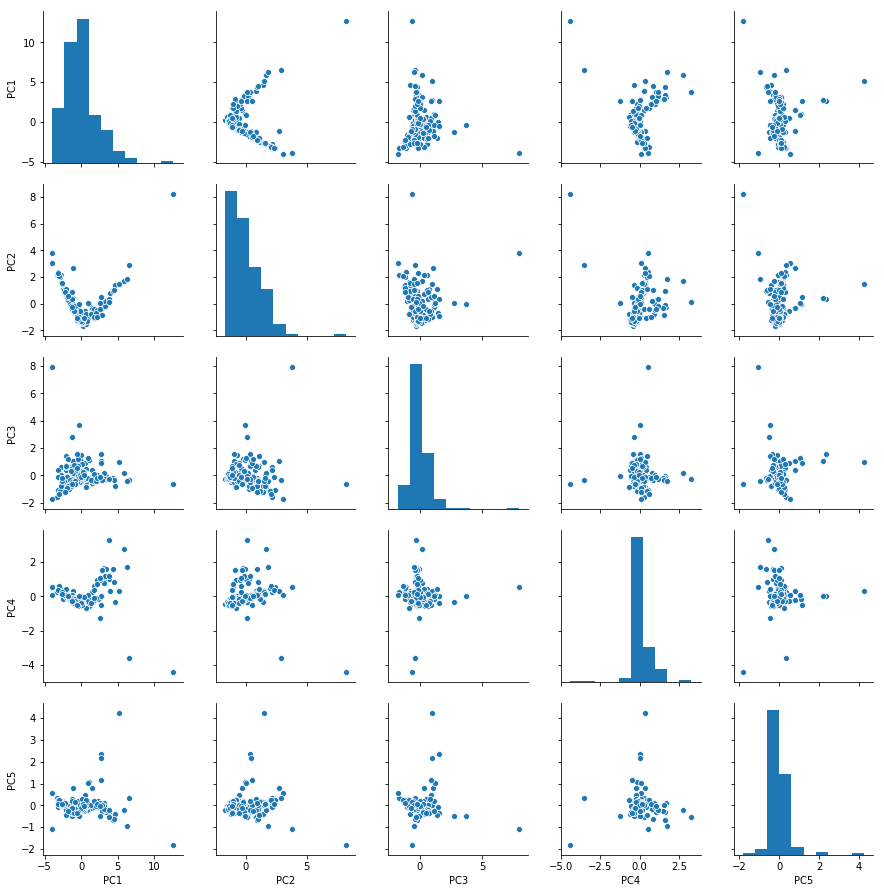

In [30]:
# Visualizing the Principal Component's points

sns.pairplot(pc_df)

In [31]:
# There is no clear and distinct clusters

In [32]:
# ** Step 5 : Clustering **

In [33]:
# 5.1 Calculating the Hopkins-Statistic

def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(pc_df)

0.9187678934871687

In [35]:
# As the Hopkins score is greater that 0.5, the data has great tendancy to form clusters

In [36]:
# 5.2 Finding the optimal number of clusters

In [37]:
# 5.2.1 Silhouette Score Analysis

sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(pc_df)
    sse.append([k, silhouette_score(pc_df, kmeans.labels_)])

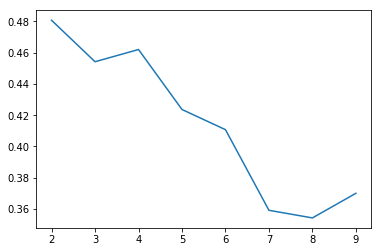

In [38]:
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);

In [39]:
# 2 clusters seem to be optimal here

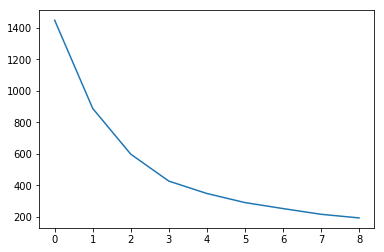

In [40]:
# 5.2.2 Elbow Curve Method

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pc_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [41]:
# 2 clusters seem to be optimal here

In [42]:
# Taking k = 2 clusters

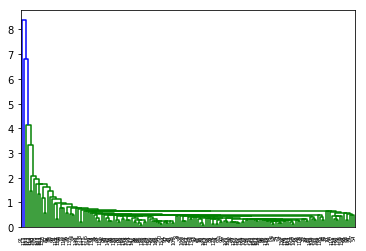

In [43]:
# 5.3 Hierarchical Clustering

# 5.3.1 Single Linkage

merging = linkage(pc_df, method = "single", metric = "euclidean")
dendrogram(merging)
plt.show()

In [44]:
# Not much is discernible here

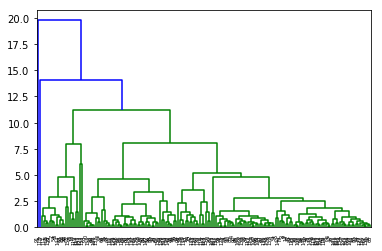

In [45]:
# 5.3.2 Complete Linkage

merging = linkage(pc_df, method = "complete", metric = "euclidean")
dendrogram(merging)
plt.show()

In [46]:
# 5.3.3 Taking 2 clusters

cluster_labels = cut_tree(merging, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# There is only 1 country in cluster 2.

In [48]:
# 5.3.4 Assigning Cluster_labels to Countries_scaled

Countries['Cluster_Label'] = cluster_labels
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


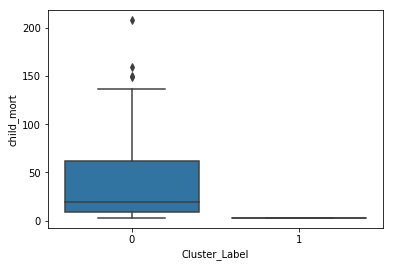

In [49]:
# 5.3.5 Plotting gdpp, child_mort and income against Cluster_label

# 5.3.5.1 child_mort

sns.boxplot(x='Cluster_Label', y='child_mort', data=Countries)

In [50]:
# Cluster 0 has higher child_mort rate than cluster 1

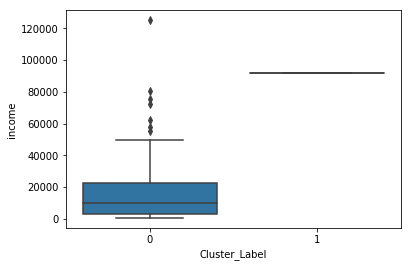

In [51]:
# 5.3.5.2 income

sns.boxplot(x='Cluster_Label', y='income', data=Countries)

In [52]:
# Cluster 1 has higher income than the cluster 0

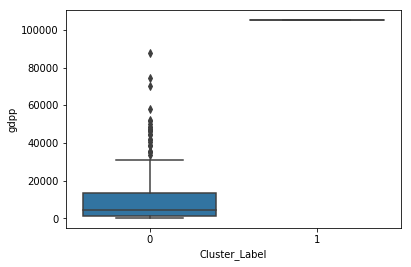

In [53]:
# 5.3.5.3 gdpp

sns.boxplot(x='Cluster_Label', y='gdpp', data=Countries)

In [54]:
# Clusters 1 have higher gdpp than cluster 0.

# Countries in cluster 0 require the funding according to Hiererachical Clustering. But it is not suitable to use this 
# as there is only 1 country in 1 cluster

In [55]:
# 5.4 K Means using k = 2

In [56]:
model_clus = KMeans(n_clusters = 2, max_iter=50, random_state = 50)
model_clus.fit(pc_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [57]:
# 5.4.1 Concatinating the clusters labels to Countries data
Countries ['ClusterID'] = model_clus.labels_
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Label,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


In [58]:
# 5.4.2 Finding the number of countries in each cluster
Countries['ClusterID'].value_counts()

1    130
0     37
Name: ClusterID, dtype: int64

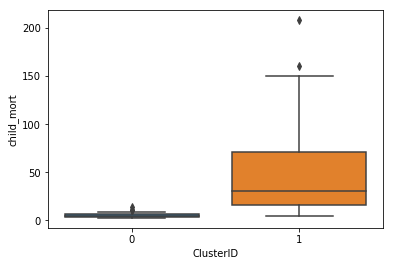

In [59]:
# 5.4.3 Plotting gdpp, child_mort and income against ClusterID

# 5.4.3.1 child_mort

sns.boxplot(x='ClusterID', y='child_mort', data=Countries)

In [60]:
# Cluster 1 has higher child_mort rate than cluster 0

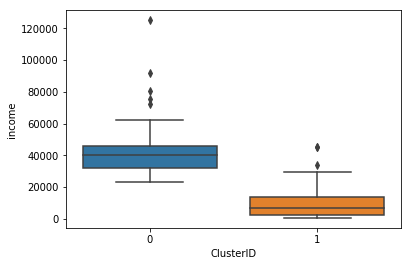

In [61]:
# 5.4.3.2 income

sns.boxplot(x='ClusterID', y='income', data=Countries)

In [62]:
# Cluster 0 has higher income than cluster 1

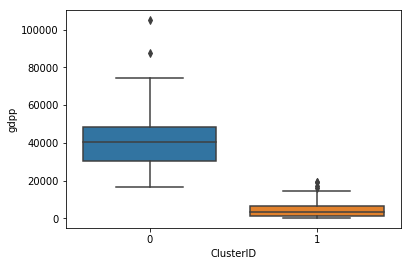

In [63]:
# 5.4.3.3 gdpp

sns.boxplot(x='ClusterID', y='gdpp', data=Countries)

In [64]:
# Cluster 0 has higher gdpp than cluster 1

In [65]:
# The countries in cluster 1 require the funds

In [66]:
# ** Step 6 : Finding the top 5 countries which require the urgent need of aid**

In [67]:
# 6.1 Taking only data of cluster 1
Countries.drop('Cluster_Label', axis = 1, inplace = True)
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [68]:
s = 1

Countries_need = Countries[Countries['ClusterID'] >= s]
Countries_need.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [69]:
# 6.2 Finding the means of child_mort, income and gdpp

# 6.2.1 child_mort
child_mort_mean = Countries_need.child_mort.mean()
child_mort_mean

47.671538461538454

In [70]:
# 6.2.2 income

income_mean = Countries_need.income.mean()
income_mean

9200.484615384616

In [71]:
# 6.2.3 gdpp

gdpp_mean = Countries_need.gdpp.mean()
gdpp_mean

4670.876923076923

In [72]:
# 6.3 Binning

Final_Countries = Countries_need[Countries_need['child_mort'] >= child_mort_mean]
Final_Countries = Final_Countries[Final_Countries['income'] <= income_mean]
Final_Countries = Final_Countries[Final_Countries['gdpp'] <= gdpp_mean]

# 6.3.1 5 Countries which has high child__mort, low income and gdpp

Final_coun = Final_Countries.nlargest(10, 'child_mort')
Final_coun = Final_coun.nsmallest(5, ['income', 'gdpp'])
Final_coun

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,1
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,1


In [73]:
# The Countries that require the funds are 
## 1. Sierra Leone
## 2. Central African Republic
## 3. Niger
## 4. Congo, Dem.Rep
## 5. Burkina Faso

In [3]:
!jupyter nbconvert --to html "Clustering-PCA Assignment".ipynb

[NbConvertApp] Converting notebook Clustering-PCA Assignment.ipynb to html
[NbConvertApp] Writing 1030172 bytes to Clustering-PCA Assignment.html
